In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
from treatment import get_treated_data

In [68]:
X_train, X_test, y_train, y_test = get_treated_data()

In [69]:
mlp_model =MLPClassifier(max_iter=200)
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [70]:
y_pred = mlp_model.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.979372197309417


In [72]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.89      0.92       149

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [73]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

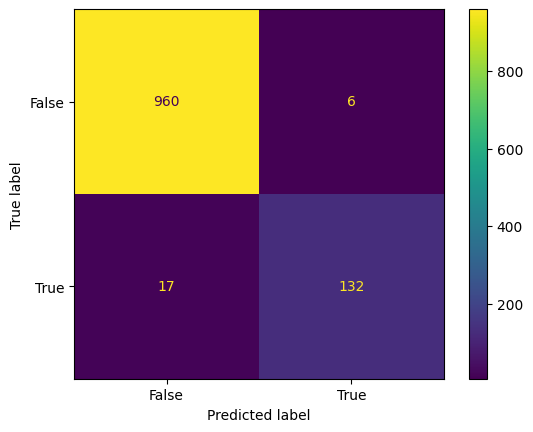

In [74]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [75]:
#Implementação do Grid Search

In [76]:
param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['logistic', 'relu', 'Tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

In [77]:
grid_search = GridSearchCV(mlp_model, param_grid, refit = True, verbose = 3) 
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   2.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   1.8s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   1.8s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.866 total time=   2.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.866 total time=   1.8s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.985 total time=  10.4s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.981 total time=  11.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.976 total time=   9.0s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.981 total time=  10.3s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.979 total time=   9.4s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.865 total time=   8.3s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.865 total time=   5.8s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.865 total time=   5.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.866 total time=   6.7s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=i

C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.981 total time=  17.1s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.978 total time=  14.0s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.979 total time=  13.5s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.978 total time=  13.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.865 total time=   6.8s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.865 total time=  11.0s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.865 total time=  10.3s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.866 total time=   3.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.866 total time=   2.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.984 total time=  11.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.980 total time=  11.0s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.978 total time=  13.5s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.979 total time=  13.8s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.978 total time=  12.8s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=   4.3s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=   4.3s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=   4.3s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.866 total time=   4.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.866 total time=   4.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.985 total time=  12.4s
[C

C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.978 total time=  12.6s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.979 total time=  12.7s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.976 total time=  16.1s
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   1.6s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   1.7s
[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   1.6s
[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.866 total time=   2.0s
[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.86

C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.971 total time=  12.7s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.967 total time=  12.2s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.969 total time=  12.1s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.969 total time=  12.3s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.960 total time=  12.2s
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.865 total time=   6.8s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.865 total time=   3.0s
[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.865 total time=   9.9s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.866 total time=   9.8s
[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.866 total time=   5.5s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.971 total time=  13.9s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.966 total time=  12.5s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.961 total time=  12.4s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.971 total time=  12.4s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.960 total time=  13.3s
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=   4.7s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=   4.0s
[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=   4.4s
[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.866 total time=   4.0s
[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.866 total time=   4.2s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.979 total time=  13.8s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.961 total time=  13.3s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.960 total time=  14.0s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.970 total time=  12.7s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.946 total time=  12.5s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   1.8s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   2.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   1.3s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.866 total time=   1.6s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.866 total time=   1.3s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.980 total t

C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.865 total time=   8.4s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.865 total time=   8.7s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.865 total time=   8.9s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.866 total time=   8.4s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.866 total time=   8.6s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.984 total time=   5.8s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.980 total time=   5.4s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.975 total time=   5.4s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.976 total time=   5.5s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.973 total time=   5.7s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.865 total time=   2.1s
[CV 2/5] END activation=rel

C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=   8.5s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=   9.8s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=   5.7s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.866 total time=   8.4s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.866 total time=   8.3s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.983 total time=   5.5s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.980 total time=   5.5s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.973 total time=   6.4s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.976 total time=   6.3s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.973 total time=   6.9s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.865 total time=   1.1s
[CV 2/5] END activation=

C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.971 total time=   8.3s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.971 total time=   3.1s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.979 total time=   3.4s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.975 total time=   2.9s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.135 total time=   7.9s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.135 total time=   6.8s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.135 total time=   6.9s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.866 total time=   2.2s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.866 total time=   1.4s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.982 total time=   2.8s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.973 total time=   2.9s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.972 total time=   2.6s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.976 

C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.865 total time=  10.1s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.865 total time=  10.5s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.865 total time=  10.2s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.866 total time=  10.3s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.866 total time=  13.8s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.987 total time=  11.8s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.972 total time=   9.9s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.971 total time=  11.2s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.976 total time=  11.2s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.975 total time=  11.5s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.135 total time=   6.4s
[CV 2/5] END activation=relu, alpha=0.05,

C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=  11.8s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=  11.4s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.865 total time=  11.7s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.866 total time=  11.3s


C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.866 total time=  12.0s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.987 total time=   9.8s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.972 total time=   9.8s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.971 total time=  10.5s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.976 total time=  11.7s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.975 total time=  13.4s
[CV 1/5] END activation=Tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=nan total time=   0.0s
[CV 2/5] END activation=Tanh, alpha=

C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Usuario\Documents\GitHub\IA-SpamCheck\env\Lib\site-packages\sklearn\base.py", line 666, 

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu', 'Tanh'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=3)

In [78]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


In [79]:
best_mlp_model = grid_search.best_estimator_

In [80]:
best_mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 30, 10))

In [81]:
grid_pred = best_mlp_model.predict(X_test)

In [82]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

Acurácia do modelo: 0.9865470852017937


In [83]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [84]:
grid_confusion_matrix = metrics.confusion_matrix(y_test, grid_pred)

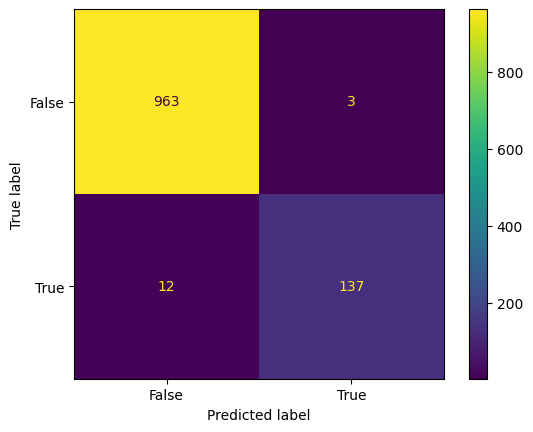

In [85]:
grid_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()